**EchoWater-AI Based Water Pollution Detection(week 1)**

PROBLEM STATEMENT

Water pollution threatens ecosystems and human health; this project uses AI to automatically detect and classify polluted water for faster and more reliable monitoring

STEP 1:Import libraries

In [2]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np



STEP 2:Load Dataset

In [3]:
from google.colab import files
import zipfile

# Upload ZIP file (your dataset)
uploaded = files.upload()

# Get uploaded file name
zip_file = next(iter(uploaded))

# Extract ZIP into 'dataset' folder
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("✅ Files extracted to 'dataset/' folder")

Saving water images (3).zip to water images (3).zip
✅ Files extracted to 'dataset/' folder


In [5]:
import zipfile

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("✅ Dataset extracted successfully!")



✅ Dataset extracted successfully!


In [6]:
import os

train_path = "dataset/water images (2)/water images"   # correct location

for folder in os.listdir(train_path):
    count = len(os.listdir(os.path.join(train_path, folder)))
    print(folder, ":", count, "images")

Clean-samples : 162 images
Dirty-samples : 130 images


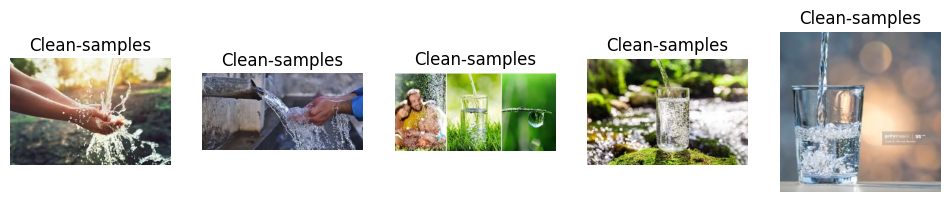

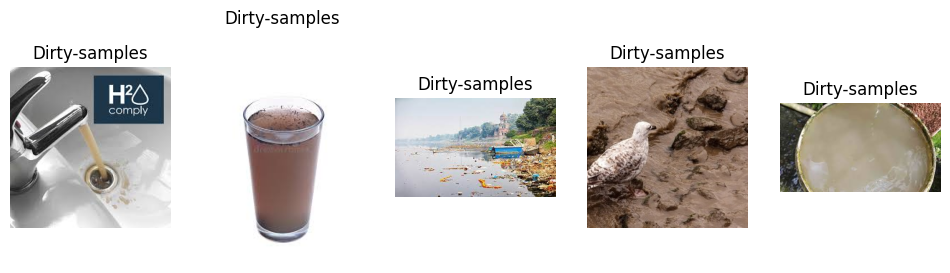

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display 5 sample images from each class
classes = ["Clean-samples", "Dirty-samples"]

for cls in classes:
    folder_path = os.path.join(train_path, cls)
    sample_images = os.listdir(folder_path)[:5]

    plt.figure(figsize=(12, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls)
    plt.show()

STEP 3:Explore Dataset

Before training any model, we need to understand the dataset.
We will:

.Check total number of images
.See distribution of classes
.Look for missing values
.View a random sample image

In [8]:
from PIL import Image

# 1. Check number of classes
classes = os.listdir(train_path)
print("Classes:", classes)

# 2. Count images in each class
for cls in classes:
    folder_path = os.path.join(train_path, cls)
    print(f"{cls}: {len(os.listdir(folder_path))} images")

# 3. Check image shapes (take first image from each class)
for cls in classes:
    folder_path = os.path.join(train_path, cls)
    sample_img = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, sample_img)
    img = Image.open(img_path)
    print(f"{cls} sample image shape: {img.size}, mode: {img.mode}")

# 4. Check for corrupted images
corrupted = 0
for cls in classes:
    folder_path = os.path.join(train_path, cls)
    for img_name in os.listdir(folder_path):
        try:
            img = Image.open(os.path.join(folder_path, img_name))
            img.verify()
        except:
            corrupted += 1

print("Number of corrupted images:", corrupted)


Classes: ['Clean-samples', 'Dirty-samples']
Clean-samples: 162 images
Dirty-samples: 130 images
Clean-samples sample image shape: (275, 183), mode: RGB
Dirty-samples sample image shape: (225, 225), mode: RGB
Number of corrupted images: 0
